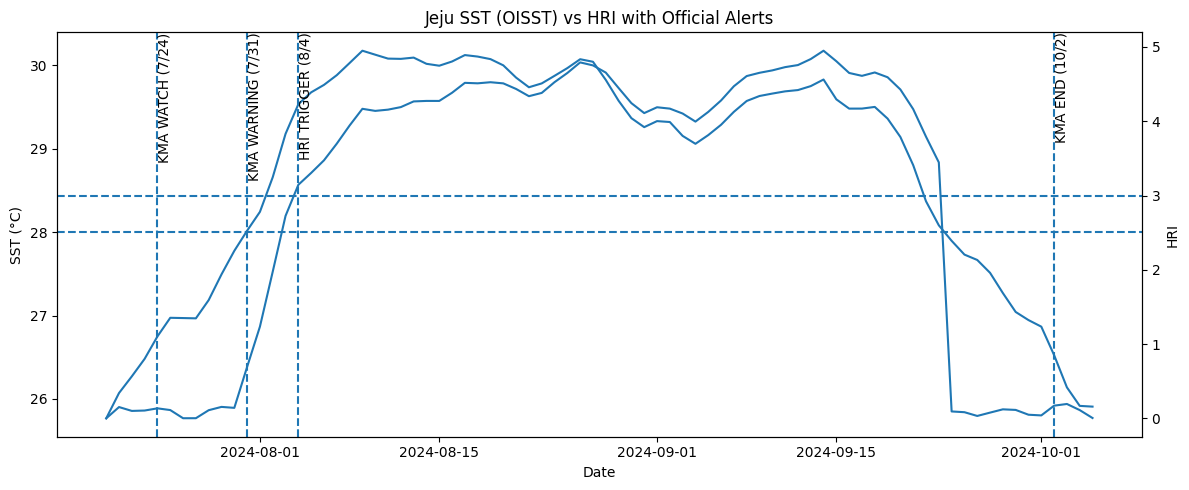

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 결과 CSV 로드
df = pd.read_csv("outputs/oisst_jeju_hri.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# 2) 표시할 주요 날짜 (실제 특보 / HRI 트리거)
official_watch = pd.to_datetime("2024-07-24")   # 주의보 발령
official_warning = pd.to_datetime("2024-07-31") # 경보 격상
official_end = pd.to_datetime("2024-10-02")     # 해제

# HRI 트리거 첫 발생일(너 로그 기준 2024-08-04)
hri_trigger = pd.to_datetime("2024-08-04")

# 3) 그래프
plt.figure(figsize=(12, 5))
ax1 = plt.gca()

# SST (왼쪽 y축)
ax1.plot(df["date"], df["T_t"])
ax1.axhline(28.0, linestyle="--")  # 28℃ 기준선
ax1.set_xlabel("Date")
ax1.set_ylabel("SST (°C)")

# 수직선: 실제 특보
ax1.axvline(official_watch, linestyle="--")
ax1.text(official_watch, ax1.get_ylim()[1], "KMA WATCH (7/24)", rotation=90, va="top")

ax1.axvline(official_warning, linestyle="--")
ax1.text(official_warning, ax1.get_ylim()[1], "KMA WARNING (7/31)", rotation=90, va="top")

ax1.axvline(official_end, linestyle="--")
ax1.text(official_end, ax1.get_ylim()[1], "KMA END (10/2)", rotation=90, va="top")

# 수직선: HRI 트리거
ax1.axvline(hri_trigger, linestyle="--")
ax1.text(hri_trigger, ax1.get_ylim()[1], "HRI TRIGGER (8/4)", rotation=90, va="top")

# HRI (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(df["date"], df["HRI"])
ax2.axhline(3.0, linestyle="--")  # HRI 임계치(너 설정: 3.0)
ax2.set_ylabel("HRI")

plt.title("Jeju SST (OISST) vs HRI with Official Alerts")
plt.tight_layout()
plt.show()